In [18]:
import pandas as pd

In [19]:
url = 'https://datosabiertos.enacom.gob.ar/rest/datastreams/241683/data.csv'
df_ing_telefonia_fija = pd.read_csv(url, encoding= 'UTF-8', sep= ',', decimal=',', thousands='.', quotechar='"' )

In [20]:
df_ing_telefonia_fija.head()

,Año,Trimestre,Ingresos (miles de $)
0,2014,1,2916071.75
1,2014,2,2974865.20
2,2014,3,3105462.02
3,2014,4,3339690.90
4,2015,1,3260124.75


In [21]:
# Redondear y convertir la columna 'col1' a int
df_ing_telefonia_fija['Ingresos (miles de $)'] = df_ing_telefonia_fija['Ingresos (miles de $)'].round().astype('Int64')

In [22]:
df_ing_telefonia_fija.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Año                    35 non-null     int64
 1   Trimestre              35 non-null     int64
 2   Ingresos (miles de $)  35 non-null     Int64
dtypes: Int64(1), int64(2)
memory usage: 1003.0 bytes


In [23]:
df_ing_telefonia_fija.isnull().sum()

Año                      0
Trimestre                0
Ingresos (miles de $)    0
dtype: int64

In [24]:
df_ing_telefonia_fija.drop_duplicates().head()

,Año,Trimestre,Ingresos (miles de $)
0,2014,1,2916072
1,2014,2,2974865
2,2014,3,3105462
3,2014,4,3339691
4,2015,1,3260125


In [25]:
df_ing_telefonia_fija.describe()

,Año,Trimestre,Ingresos (miles de $)
count,35.000000,35.000000,35.0
mean,2017.885714,2.457143,12723137.314286
std,2.564135,1.120474,10412718.367815
min,2014.000000,1.000000,2916072.0
25%,2016.000000,1.500000,4458515.0
50%,2018.000000,2.000000,8252280.0
75%,2020.000000,3.000000,20035940.5
max,2022.000000,4.000000,40616059.0


In [26]:
df_ing_telefonia_fija.describe(include='all')

,Año,Trimestre,Ingresos (miles de $)
count,35.000000,35.000000,35.0
mean,2017.885714,2.457143,12723137.314286
std,2.564135,1.120474,10412718.367815
min,2014.000000,1.000000,2916072.0
25%,2016.000000,1.500000,4458515.0
50%,2018.000000,2.000000,8252280.0
75%,2020.000000,3.000000,20035940.5
max,2022.000000,4.000000,40616059.0


In [27]:
df_ing_telefonia_fija.rename(columns={'Año': 'anio'}, inplace=True)
df_ing_telefonia_fija.rename(columns={'Trimestre': 'trimestre'}, inplace=True)
df_ing_telefonia_fija.rename(columns={'Ingresos (miles de $)': 'ingresos (miles de pesos)'}, inplace=True)

In [28]:
df_ing_telefonia_fija['anio_tri'] = df_ing_telefonia_fija['anio'].astype(str) + df_ing_telefonia_fija['trimestre'].astype(str)

In [29]:
# Situar la columna 'anio_tri' como la primera columna
df_ing_telefonia_fija = df_ing_telefonia_fija[['anio_tri'] + df_ing_telefonia_fija.columns[:-1].tolist()]

In [30]:
import seaborn as sns

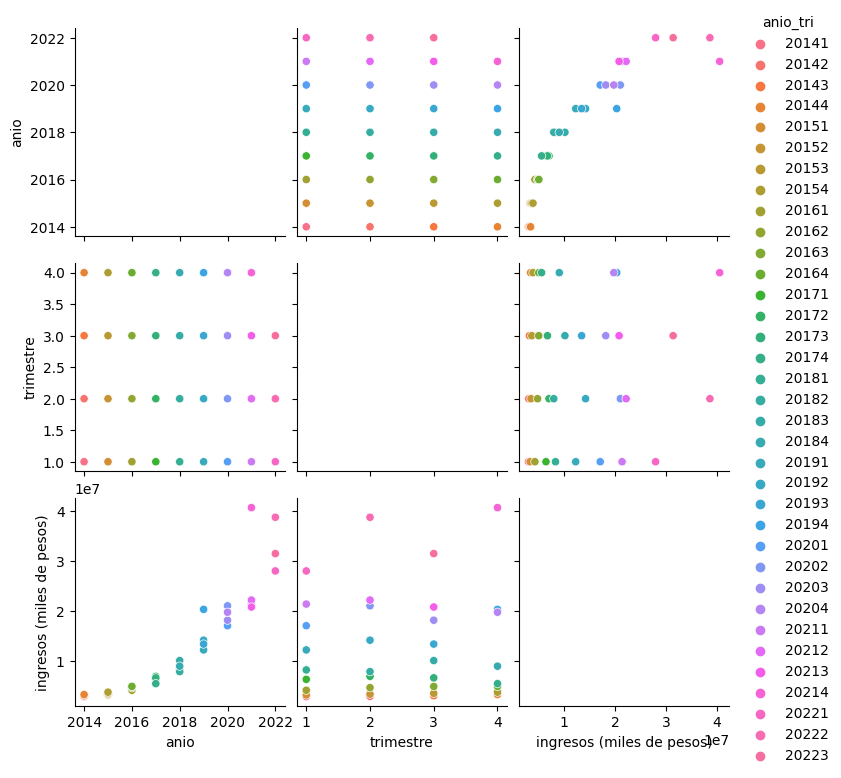

In [31]:
sns.pairplot(df_ing_telefonia_fija,hue='anio_tri')

In [32]:
df_ing_telefonia_fija = df_ing_telefonia_fija.sort_values(by=['anio_tri'])

In [34]:
# Calcular la variación porcentual
df_ing_telefonia_fija['variacion trimestral ingresos (miles de pesos)'] = df_ing_telefonia_fija['ingresos (miles de pesos)'].pct_change()

# Reordenar las columnas para que la nueva columna quede junto a "trimestre" y "ingresos (miles de pesos)"
df_ing_telefonia_fija = df_ing_telefonia_fija[['anio_tri', 'anio', 'trimestre', 'variacion trimestral ingresos (miles de pesos)', 'ingresos (miles de pesos)']]

In [35]:
# Reemplazar los valores nulos con 0
df_ing_telefonia_fija.fillna(0, inplace=True)

# Convertir la columna "anio_tri" a int64
df_ing_telefonia_fija['anio_tri'] = df_ing_telefonia_fija['anio_tri'].astype('int64')

In [36]:
df_ing_telefonia_fija.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   anio_tri                                        35 non-null     int64  
 1   anio                                            35 non-null     int64  
 2   trimestre                                       35 non-null     int64  
 3   variacion trimestral ingresos (miles de pesos)  35 non-null     Float64
 4   ingresos (miles de pesos)                       35 non-null     Int64  
dtypes: Float64(1), Int64(1), int64(3)
memory usage: 1.7 KB


In [37]:
df_ing_telefonia_fija.describe()

,anio_tri,anio,trimestre,variacion trimestral ingresos (miles de pesos),ingresos (miles de pesos)
count,35.000000,35.000000,35.000000,35.0,35.0
mean,20181.314286,2017.885714,2.457143,0.092466,12723137.314286
std,25.595003,2.564135,1.120474,0.238563,10412718.367815
min,20141.000000,2014.000000,1.000000,-0.310972,2916072.0
25%,20161.500000,2016.000000,1.500000,-0.042345,4458515.0
50%,20182.000000,2018.000000,2.000000,0.049419,8252280.0
75%,20202.500000,2020.000000,3.000000,0.14135,20035940.5
max,20223.000000,2022.000000,4.000000,0.953635,40616059.0


In [38]:
df_ing_telefonia_fija.head()

,anio_tri,anio,trimestre,variacion trimestral ingresos (miles de pesos),ingresos (miles de pesos)
0,20141,2014,1,0.0,2916072
1,20142,2014,2,0.020162,2974865
2,20143,2014,3,0.0439,3105462
3,20144,2014,4,0.075425,3339691
4,20151,2015,1,-0.023824,3260125


In [39]:
# Guardar DataFrame como archivo CSV
df_ing_telefonia_fija.to_csv('../CSV_Cleaned/df_ing_telefonia_fija_con_var.csv',mode='w', index=False)